In [1]:
import pandas as pd

file = pd.read_csv("Housing.csv")

In [2]:
file.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
file.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [4]:
file['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [5]:
file['furnishingstatus'] = file['furnishingstatus'].map({'furnished':1, 'semi-furnished':2, 'unfurnished':0})

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohefile = ohe.fit_transform(file[['furnishingstatus']]).toarray()
ohe_df = pd.DataFrame(ohefile, columns=ohe.get_feature_names_out(['furnishingstatus']))
file = pd.concat([file, ohe_df], axis=1).drop(columns=['furnishingstatus'])


In [6]:
cat_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in cat_col:
    file[col] = file[col].map({'yes':1, 'no':0})

In [8]:
target = file['price']
features = file.drop(columns=['price'])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"RMSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

RMSE: 1747758260816.2134
MAE: 956660.380038148
R2 Score: 0.6542221839581839


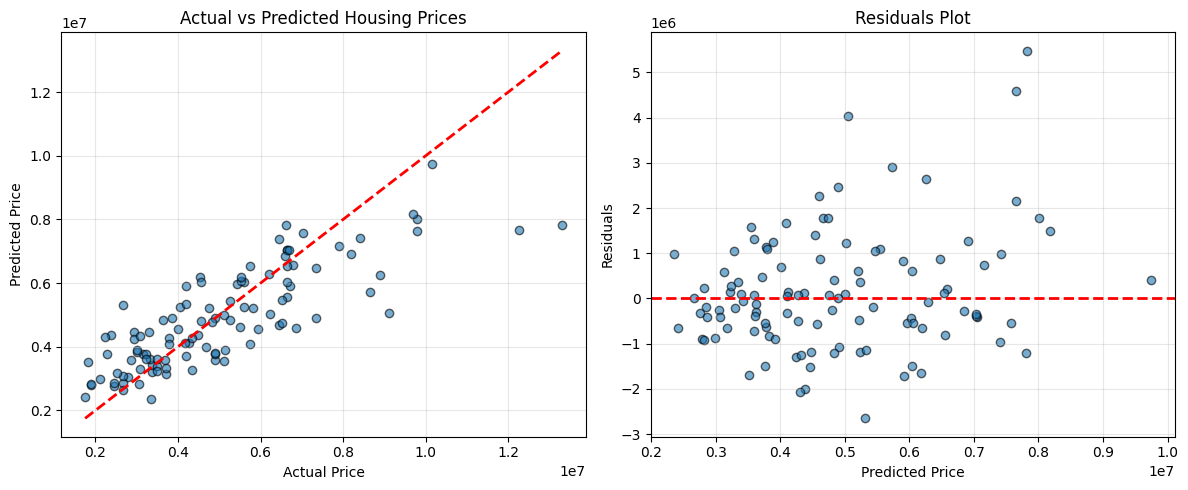

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs predicted values
plt.figure(figsize=(12, 5))

# Subplot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True, alpha=0.3)

# Subplot 2: Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300)
plt.show()


LINEAR REGRESSION COEFFICIENTS INTERPRETATION

Intercept (Base Price): $-153,020.40

Coefficients (sorted by impact):

         Feature  Coefficient
       bathrooms 1.098786e+06
 airconditioning 8.145877e+05
 hotwaterheating 6.962286e+05
        prefarea 6.344058e+05
         stories 4.228184e+05
        basement 4.137649e+05
        mainroad 3.996022e+05
         parking 2.378468e+05
       guestroom 2.363690e+05
furnishingstatus 1.269144e+05
        bedrooms 7.423821e+04
            area 2.373595e+02

INTERPRETATION:
• bathrooms: For each unit increase, price increases by $1,098,785.63
• airconditioning: For each unit increase, price increases by $814,587.67
• hotwaterheating: For each unit increase, price increases by $696,228.58
• prefarea: For each unit increase, price increases by $634,405.79
• stories: For each unit increase, price increases by $422,818.37
• basement: For each unit increase, price increases by $413,764.91
• mainroad: For each unit increase, price increases by $

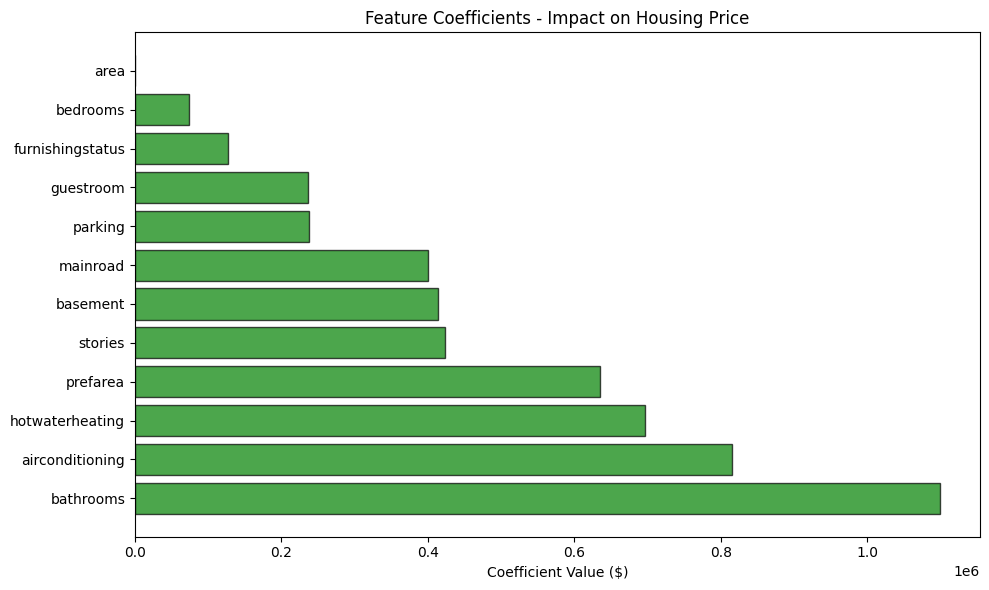

In [12]:
# Extract and display model coefficients
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

print("=" * 60)
print("LINEAR REGRESSION COEFFICIENTS INTERPRETATION")
print("=" * 60)
print(f"\nIntercept (Base Price): ${model.intercept_:,.2f}\n")
print("Coefficients (sorted by impact):\n")
print(coefficients.to_string(index=False))

print("\n" + "=" * 60)
print("INTERPRETATION:")
print("=" * 60)
for idx, row in coefficients.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    if coef > 0:
        print(f"• {feature}: For each unit increase, price increases by ${coef:,.2f}")
    else:
        print(f"• {feature}: For each unit increase, price decreases by ${abs(coef):,.2f}")

# Visualize coefficients
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coefficients['Coefficient']]
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value ($)')
plt.title('Feature Coefficients - Impact on Housing Price')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('feature_coefficients.png', dpi=300)
plt.show()
